# 📊 Eksplorasi Data (EDA)

## 1. Memuat Data
Data diambil dari database PostgreSQL menggunakan **SQLAlchemy** dan **pandas**. Data ini kemudian dimasukkan ke dalam `DataFrame` agar lebih mudah dianalisis.

---

## 2. Informasi Dasar Data
- `df.info()` → mengetahui jumlah baris, jumlah kolom, serta tipe data tiap variabel (numerik/kategorikal).
- `df.describe()` → memberikan statistik deskriptif untuk data numerik (mean, min, max, quartile).

**Tujuan:** memberikan gambaran awal tentang bentuk data.

---

## 3. Cek Missing Values
- `df.isnull().sum()` → menghitung jumlah nilai kosong per kolom.
- Persentase missing values dihitung agar tahu seberapa besar pengaruhnya.

**Tujuan:** mengetahui kualitas data dan strategi penanganan (hapus, isi dengan median/modus, dll).

---

## 4. Analisis Tipe Data
- Memisahkan kolom **numerik** (integer/float) dan **kategorikal** (string/objek).
- Analisis numerik (outlier, korelasi) berbeda dengan analisis kategorikal (frekuensi, konsistensi).

**Tujuan:** mempermudah pemilihan metode analisis sesuai tipe data.

---

## 5. Analisis Outlier
- Visualisasi menggunakan **boxplot** (`sns.boxplot`).
- Outlier terlihat sebagai titik yang jauh dari distribusi normal data.

**Tujuan:** mendeteksi nilai ekstrem yang dapat mempengaruhi analisis.

---

## 6. Distribusi Data
- Plot histogram (`df.hist`) untuk kolom numerik.
- Menunjukkan pola distribusi (normal, skewed/miring).

**Tujuan:** memahami sebaran data dan memutuskan transformasi jika perlu.

---

## 7. Konsistensi Data Kategorikal
- Mengecek nilai unik (`df[col].unique()`) dan distribusi kategori (`value_counts()`).
- Misalnya: kolom `jenis_kelamin` harusnya hanya “Laki-laki” dan “Perempuan”, tetapi bisa saja ada typo seperti “Lk” atau “Pr”.

**Tujuan:** menemukan ketidakkonsistenan label kategori.

---

## 8. Korelasi Antar Variabel
- Matriks korelasi (`df.corr()`) divisualisasikan dengan heatmap seaborn.
- Memberi gambaran variabel mana yang saling berhubungan kuat.

**Tujuan:** mencari pola hubungan antar variabel numerik.

---

## 9. Handling Missing Values
- Kolom numerik → diisi dengan median.
- Kolom kategorikal → diisi dengan modus (nilai terbanyak).
- Alternatif lain: hapus baris/kolom, atau gunakan metode imputasi lanjutan.

**Tujuan:** membuat data lebih lengkap sehingga siap untuk analisis lanjutan.

---

## 10. Simpan Data Bersih
- Setelah pembersihan (handling missing values, outlier, dll), data dapat disimpan ke `.csv`.
- Data bersih digunakan untuk tahap **pemodelan** atau analisis lanjutan.

---

✨ **Kesimpulan:**  
Eksplorasi Data (EDA) bertujuan untuk memahami data sebelum dipakai pada analisis lanjutan atau machine learning.  
Tahapan ini membantu mendeteksi error input, ketidakkonsistenan, missing values, outlier, serta menemukan pola awal dalam data.


## Memuat Data

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sqlalchemy import create_engine

# --- Koneksi PostgreSQL ---
db_user = 'postgres'
db_password = '123456789'  # ganti dengan passwordmu
db_host = 'localhost'
db_port = '5432'
db_name = 'rumahsakit'
table_name = 'data_master'

# Buat koneksi
connection_url = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}'
engine = create_engine(connection_url)

# Ambil data
df = pd.read_sql(f"SELECT * FROM {table_name}", engine)

print("✅ Data berhasil dimuat")
df.head()


✅ Data berhasil dimuat


,Patient_ID,Age,Gender,Condition,Procedure,Cost,Length_of_Stay,Readmission,Outcome,Satisfaction
0,1,45,Female,Heart Disease,Angioplasty,15000,5,No,Recovered,4
1,2,60,Male,Diabetes,Insulin Therapy,2000,3,Yes,Stable,3
2,3,32,Female,Fractured Arm,X-Ray and Splint,500,1,No,Recovered,5
3,4,75,Male,Stroke,CT Scan and Medication,10000,7,Yes,Stable,2
4,5,50,Female,Cancer,Surgery and Chemotherapy,25000,10,No,Recovered,4


## Cek Informasi Data

In [15]:
# Info dataset: jumlah baris, kolom, tipe data
df.info()

# Statistik deskriptif untuk kolom numerik
df.describe().T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Patient_ID      984 non-null    int64 
 1   Age             984 non-null    int64 
 2   Gender          984 non-null    object
 3   Condition       984 non-null    object
 4   Procedure       984 non-null    object
 5   Cost            984 non-null    int64 
 6   Length_of_Stay  984 non-null    int64 
 7   Readmission     984 non-null    object
 8   Outcome         984 non-null    object
 9   Satisfaction    984 non-null    int64 
dtypes: int64(5), object(5)
memory usage: 77.0+ KB


,count,mean,std,min,25%,50%,75%,max
Patient_ID,984.0,500.329268,288.979531,1.0,250.75,500.5,750.25,1000.0
Age,984.0,53.754065,14.941135,25.0,45.00,55.0,65.00,78.0
Cost,984.0,8367.479675,7761.990976,100.0,1000.00,6000.0,15000.00,25000.0
Length_of_Stay,984.0,37.663618,19.595805,1.0,21.00,38.0,54.25,76.0
Satisfaction,984.0,3.598577,0.883002,2.0,3.00,4.0,4.00,5.0


## laporan missing values

In [16]:
# Jumlah missing values per kolom
df.isnull().sum()

# Persentase missing values
(df.isnull().sum() / len(df)) * 100


Patient_ID        0.0
Age               0.0
Gender            0.0
Condition         0.0
Procedure         0.0
Cost              0.0
Length_of_Stay    0.0
Readmission       0.0
Outcome           0.0
Satisfaction      0.0
dtype: float64

# Analisis tipe data 


In [17]:
# Cek tipe data tiap kolom
print(df.dtypes)

# Pisahkan kolom numerik & kategorikal
num_cols = df.select_dtypes(include=np.number).columns.tolist()
cat_cols = df.select_dtypes(exclude=np.number).columns.tolist()

print("Kolom Numerik:", num_cols)
print("Kolom Kategorikal:", cat_cols)


Patient_ID         int64
Age                int64
Gender            object
Condition         object
Procedure         object
Cost               int64
Length_of_Stay     int64
Readmission       object
Outcome           object
Satisfaction       int64
dtype: object
Kolom Numerik: ['Patient_ID', 'Age', 'Cost', 'Length_of_Stay', 'Satisfaction']
Kolom Kategorikal: ['Gender', 'Condition', 'Procedure', 'Readmission', 'Outcome']


# Analisi outlier numerik

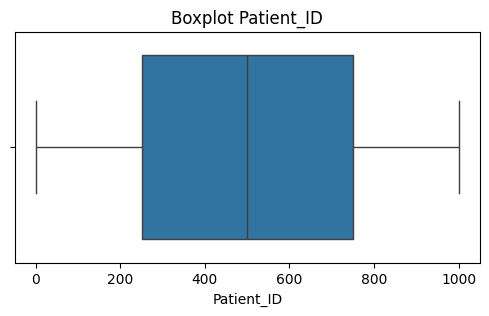

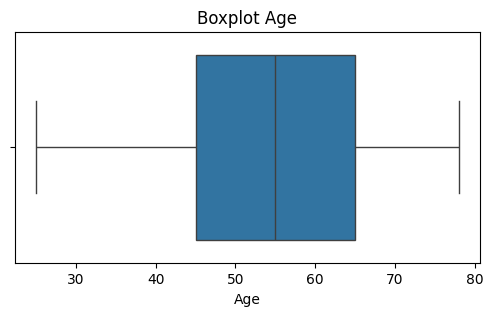

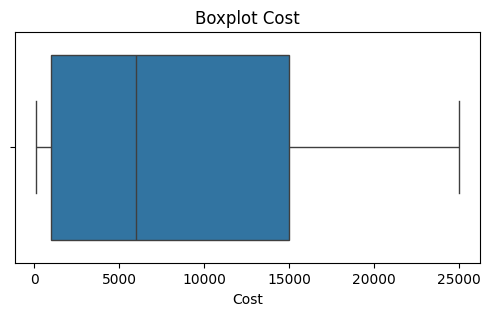

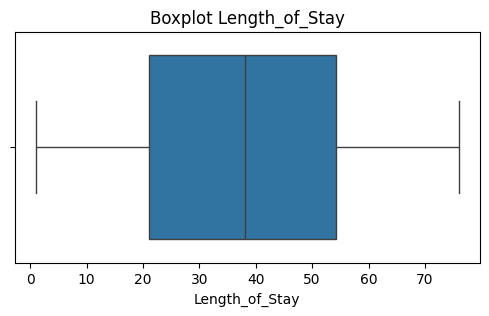

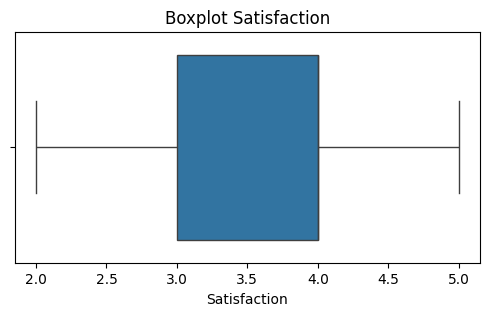

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

# Boxplot tiap kolom numerik
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()


# Distribusi data numerik

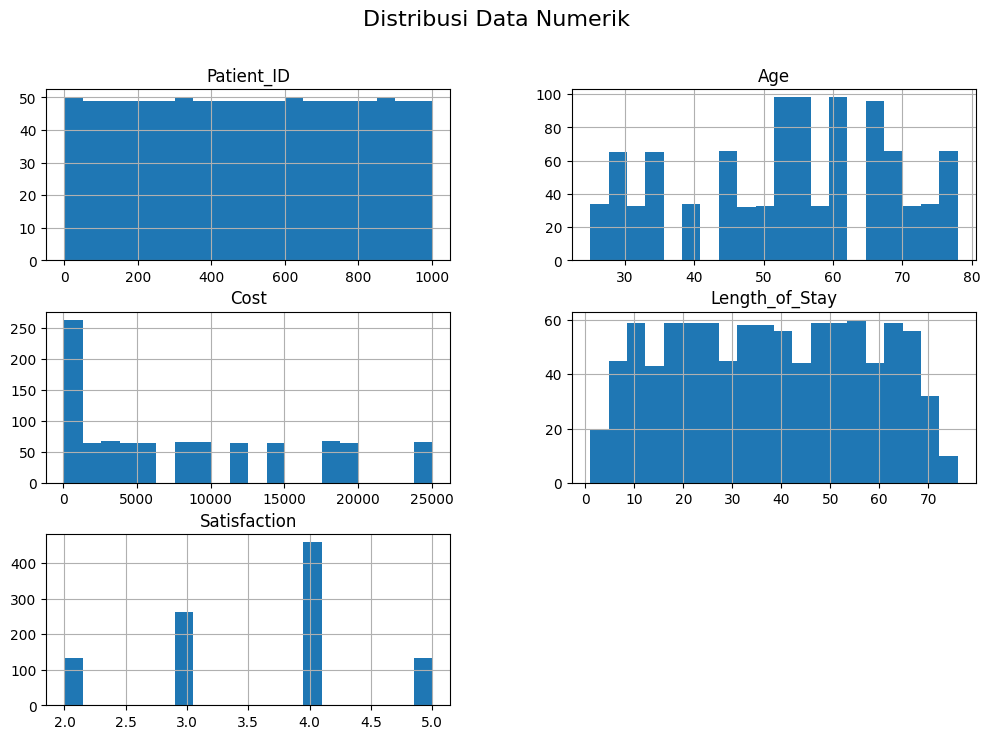

In [19]:
# Histogram distribusi numerik
df[num_cols].hist(bins=20, figsize=(12,8))
plt.suptitle("Distribusi Data Numerik", size=16)
plt.show()


# Konsistensi data

In [20]:
# Cek nilai unik tiap kolom kategorikal
for col in cat_cols:
    print(f"\nKolom: {col}")
    print(df[col].unique())
    print(df[col].value_counts())



Kolom: Gender
['Female' 'Male']
Gender
Female    524
Male      460
Name: count, dtype: int64

Kolom: Condition
['Heart Disease' 'Diabetes' 'Fractured Arm' 'Stroke' 'Cancer'
 'Hypertension' 'Appendicitis' 'Fractured Leg' 'Heart Attack'
 'Allergic Reaction' 'Respiratory Infection' 'Prostate Cancer'
 'Childbirth' 'Kidney Stones' 'Osteoarthritis']
Condition
Fractured Leg            67
Heart Attack             67
Fractured Arm            66
Hypertension             66
Appendicitis             66
Cancer                   66
Stroke                   66
Allergic Reaction        66
Diabetes                 65
Heart Disease            65
Respiratory Infection    65
Prostate Cancer          65
Childbirth               65
Kidney Stones            65
Osteoarthritis           64
Name: count, dtype: int64

Kolom: Procedure
['Angioplasty' 'Insulin Therapy' 'X-Ray and Splint'
 'CT Scan and Medication' 'Surgery and Chemotherapy'
 'Medication and Counseling' 'Appendectomy' 'Cast and Physical Therapy'
 '

# Kolerasi antar table

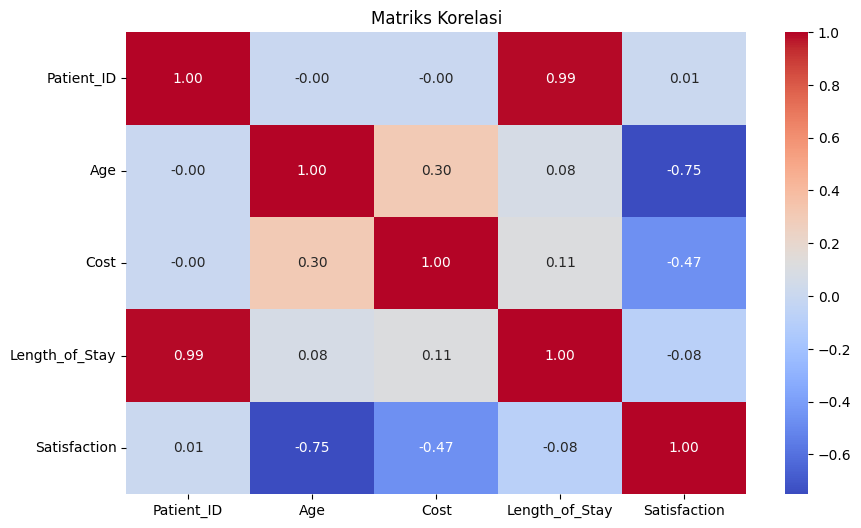

In [21]:
# Korelasi numerik
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriks Korelasi")
plt.show()
